In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import collections
import itertools

# Q1 -a: Erdos Renyi


In [300]:
def create_ER_random_graph(n=10,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a list of all edges:
    edges = [(u,v) for u in range(n) for v in range(n) if (u!=v and u>v)]
    for e in edges:
        if random.random() <= p:
            G.add_edge(*e)
    return G


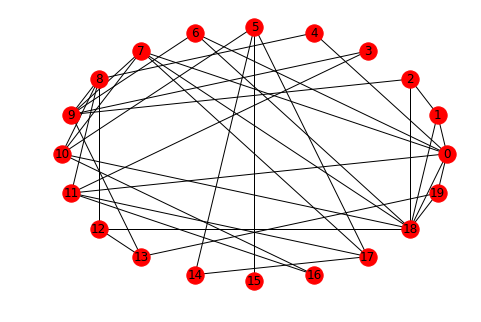

In [292]:
G1 = create_ER_random_graph(n=20,p=0.19)
nx.draw_circular(G1, with_labels=True)

# Q1 -b: Small World Model

In [285]:
def create_small_world_random_graph(n=10,k=2,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a set of all edges:
    optional_edges = {(u,v) for u in range(n) for v in range(n) if u!=v}
    chosen_edges = set()
    #Step 1
    for i in range(n):
        for j in range(k/2+1):
            for sign in [-1,1]:
                #Add the closest neighbours
                G.add_edge(i,(i+sign*j)%n)
                #Add those edges to the chosen_edges set:
                chosen_edges.add((i,(i+sign*j)%n))
                #Remove those edges from the optional_edges set:
                optional_edges.discard((i,(i+sign*j)%n))
    #nx.draw(G, with_labels=True)
    chosen_edges_list =list(chosen_edges)
    #Step 2
    for c_edge in chosen_edges:
        if random.random() <= p:
            if G.has_edge(*c_edge):
                G.remove_edge(*c_edge)
            opposite_edge = (c_edge[1],c_edge[0])
            if G.has_edge(*opposite_edge):
                G.remove_edge(*opposite_edge)
            new_edge = random.choice(filter(lambda x: x[0]==c_edge[0],optional_edges))
            G.add_edge(*new_edge)
    return G

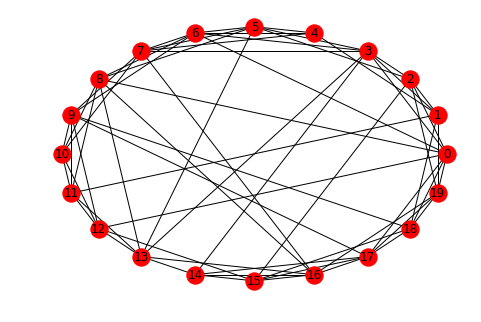

In [286]:
G2 = create_small_world_random_graph(n=20,p=0.1,k=6)
nx.draw_circular(G2, with_labels=True)

# Q1 - c: Clustering coefficient

In [287]:
def node_clustering_coeff(node,graph):
    #print "Starting: {0}".format(node)

    neighborhood = list(graph.neighbors(node))
    #print "Set: {0}".format(neighborhood)
    if node in neighborhood:
        neighborhood.remove(node)
    #print "Neighs: {0}".format(neighborhood)
    num_of_edges = 0
    for u in neighborhood:
        for v in graph.neighbors(u):
            if v in neighborhood and v != u:
                #print"({0},{1})".format(u,v)
                num_of_edges +=1
    num_of_edges = num_of_edges/2.0
    k = len(neighborhood)
    max_edges = (k*(k-1)/2.0)
    coeff = num_of_edges/max_edges
    #print "node {0}, coeff {1}, max_edges {2}, num_edges {3}".format(node, coeff, max_edges, num_of_edges)
    return coeff
        

In [288]:
def graph_clustering_coeff(graph):
    sum = 0
    amount = len(graph.nodes())
    for node in graph.nodes():
        sum += node_clustering_coeff(node,graph)
    return sum/amount
        

In [289]:
graph_clustering_coeff(G1), graph_clustering_coeff(G2)

(0.4349567099567099, 0.3607142857142857)

# Q1 - d: Running and Analysis


CC - ER: 0.199983129597,Small world: 0.337840936841
Diam - ER: 2,Small world: 7


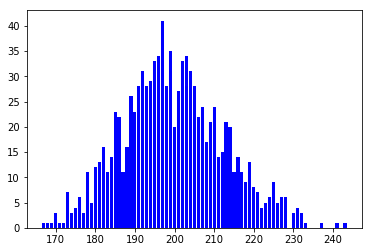

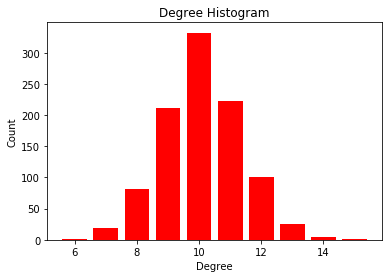

In [305]:
size = 1000
G1 = create_ER_random_graph(n=size,p=0.2)
G2 = create_small_world_random_graph(n=size,p=0.1,k=8)
print "CC - ER: {0},Small world: {1}".format(graph_clustering_coeff(G1), graph_clustering_coeff(G2))
print "Diam - ER: {0},Small world: {1}".format(nx.diameter(G1),nx.diameter(G2))

degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='r')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


plt.show()

# Q2 -a: centrality measures

In [31]:
def degree_centrality(G):
    centrality=[]
    length = len(G.nodes())
    for v in G.nodes():
        neighbors_lst = list(G.neighbors(v))
        center_val = len(neighbors_lst)/(length-1)
        centrality.append((v,center_val))
    return centrality


In [35]:
def betweenness_centrality(G):
    centrality = []
    node_lst = G.nodes()
    length = len(node_lst)
    numPaths = 0
    numPaths_node = 0
    for v in node_lst:
        res = 0
        for s in node_lst:
            for t in node_lst:
                if s<t and v!=s and v!=t:
                    for path in nx.all_shortest_paths(G, source=s, target=t):
                        numPaths += 1
                        if v in path:
                            numPaths_node += 1
                    res += (float(numPaths_node)/float(numPaths))
                    numPaths = 0
                    numPaths_node = 0
        res = res * (2.0/float((length-1)*(length-2)))
        centrality.append((v, res))
    return centrality

In [56]:
def closeness_centrality(G):
    result = []
    size = len(G.nodes())
    for v in G.nodes():
        center = 0
        distances = nx.shortest_path_length(G, source=v)
        for dis in distances.values():
            if dis != 0:
                center += dis
        center = (1.0/float(center)) * (size-1)
        result.append((v, center))
    return result

[('Medici', 0.521978021978022), ('Guadagni', 0.25457875457875456), ('Albizzi', 0.21245421245421245), ('Salviati', 0.14285714285714288), ('Ridolfi', 0.11355311355311357)]


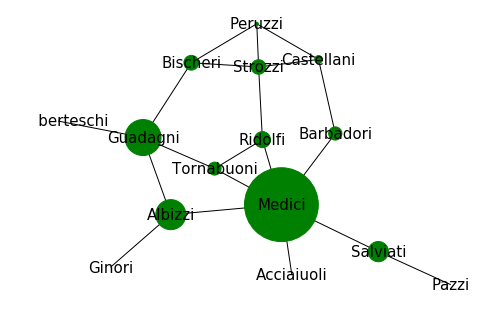

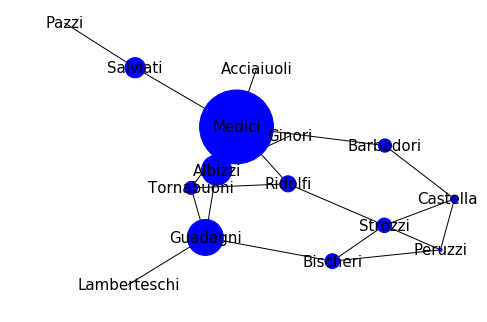

# Q3 -a: check_balance implementation

In [2]:
def find_all_cycles(G, source=3, cycle_length_limit=None):
    nodes=[i.pop() for i in nx.connected_components(G)]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]

In [219]:
def create_signed_supergraph(G,show_components = True):
    nodes = G.nodes()
    good_edges_list=[(u,v,d) for (u,v,d) in G.edges(data=True) if d['sign'] =='+']
    bad_edges_set={(u,v) for (u,v,d) in G.edges(data=True) if d['sign'] == '-'}
    only_good_graph = nx.Graph()
    super_graph = nx.Graph()
    only_good_graph.add_nodes_from(nodes)
    only_good_graph.add_edges_from(good_edges_list)
    if show_components:
        visualize_Graph(only_good_graph)
    seen_nodes = []
    node_to_supernode_map = dict()
    for index ,comp in enumerate(nx.connected_components(only_good_graph)):
        for node in comp:
            node_to_supernode_map[node] = "{0}".format(comp)
    for index ,comp in enumerate(nx.connected_components(only_good_graph)):
        #first, assert that there are no "-" edges in the connected component:
        optional_edges_list = [(u,v) for u in comp for v in comp if u!=v]
        for e in optional_edges_list:
            if G.has_edge(*e) and e in bad_edges_set:
                print "The graph is not balanced."
                only_good_graph.add_edge(*e,sign="-")
                visualize_Graph(only_good_graph, bold_red=True)
                return -1
                # should return here, the component and the bad edge??
        #Second, create a supergraph node with the respective "- edges"
        super_graph.add_node("{0}".format(comp), nodes = comp)
    for e in bad_edges_set:
        super_graph.add_edge(node_to_supernode_map[e[0]],node_to_supernode_map[e[1]],sign = "+")
    return super_graph
    


In [4]:
def create_ER_random_signed_graph(n=10,p=0.2,plus_prob=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a list of all edges:
    edges = [(u,v) for u in range(n) for v in range(n) if u!=v]
    for e in edges:
        if random.random() <= p:
            sign = "+" if random.random() <= plus_prob else "-"
            G.add_edge(*e,sign = sign)
    return G

In [251]:
def check_balance(G):
    SuperG = create_signed_supergraph(G,show_components=False)
    if SuperG==-1:
        print "There's a negative edge between two nodes in a positive connected component."
        return
    else:
        visualize_Graph(SuperG)
        if len(find_all_cycles(SuperG)) ==0:
            print("There are no cycles in the graph, therefore it is balanced!")
            return
        for cycle in find_all_cycles(SuperG):
            if len(cycle)%2==1:
                print("The supergraph is not bipartite, therefore the graph is not balanced. Odd cycle: {0}".format(cycle))
                return
        
    print("The graph is balanced!")
    return
            

In [234]:
def visualize_Graph(G,show_labels = True, bold_red = False):
    show_labels = False if len(G.nodes())>15 else True
    red_width = 10 if bold_red else 2
    plt.figure(figsize=(12,10))
    plt.axis('off')
    if G==-1:
        return
    pos=nx.kamada_kawai_layout(G) # Just a nice layout
    for i in pos:
        pos[i][0] = pos[i][0] * 2 # x coordinate
        pos[i][1] = pos[i][1] * 2 # y coordinate
    labels = dict([((u, v), d['sign']) for u, v, d in G.edges(data=True)])
    good=[(u,v) for (u,v,d) in G.edges(data=True) if d['sign'] =='+']
    bad=[(u,v) for (u,v,d) in G.edges(data=True) if d['sign'] == '-'] 
    if show_labels:
        nx.draw_networkx_edge_labels(G,pos=pos, edge_labels=labels,font_size = 17)
    e = nx.draw_networkx_edges(G,pos,edgelist=good, width=2, edge_color='g')
    e = nx.draw_networkx_edges(G,pos,edgelist=bad, width=red_width,alpha=0.5,edge_color='r')
    nx.draw(G,pos=pos,with_labels=True)
 

## Visualize:

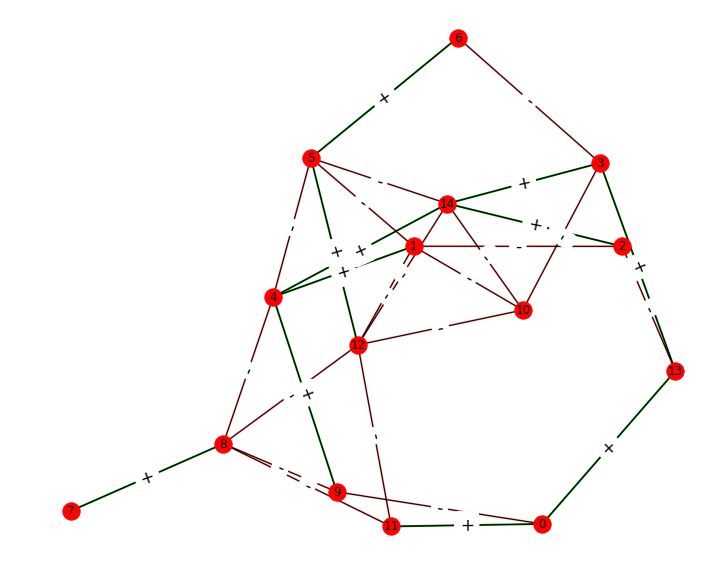

In [215]:
G =create_ER_random_signed_graph(n=15,p=0.15,plus_prob=0.5)
visualize_Graph(G)

The graph is not balanced.


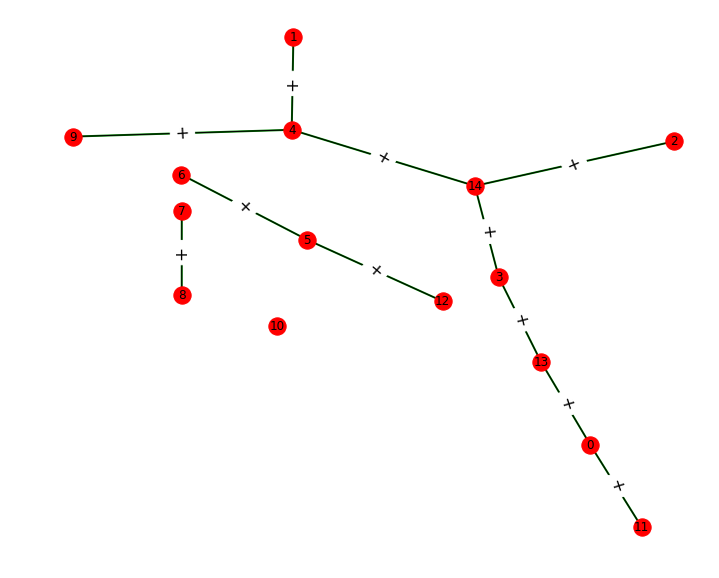

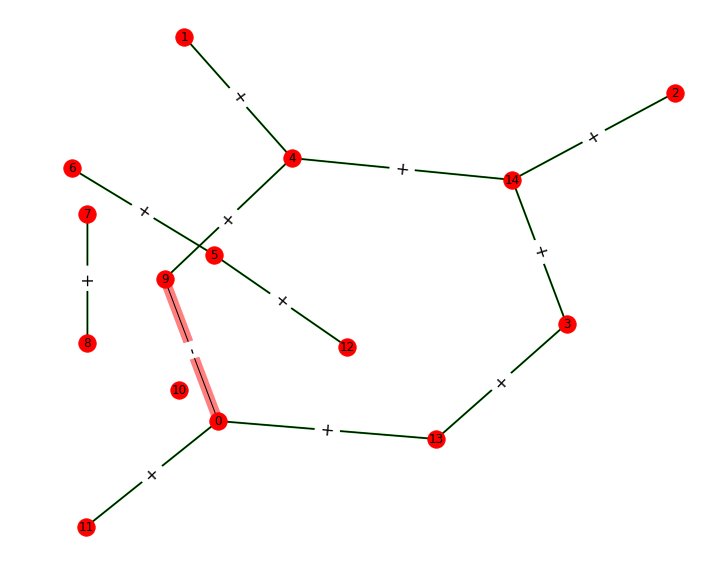

In [235]:
SG = create_signed_supergraph(G)
# The first graph shows the positive connected components.
# The red edge in the second graph is a "-" between two nodes in a positive connected component.

In [189]:
if SG != -1:
    visualize_Graph(SG)

The graph is not balanced.
There's a negative edge in a positive connected component.


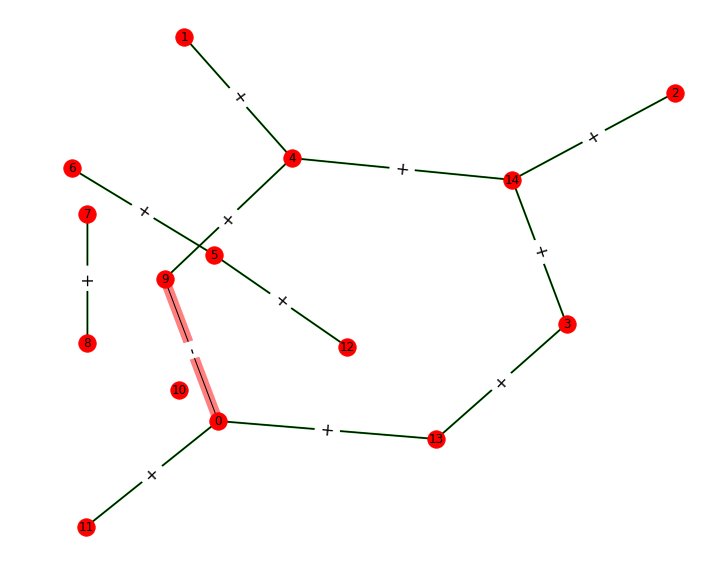

In [236]:
check_balance(G)

# Q3 - b+c:

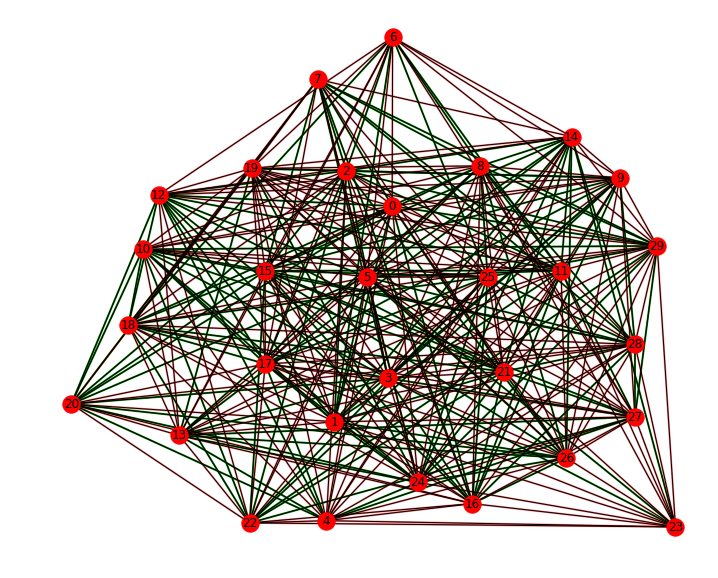

In [254]:
G0 = create_ER_random_signed_graph(30,p = 0.5,plus_prob=0.5)
visualize_Graph(G0,show_labels=False)
#This is a plot of the first graph:

The graph is not balanced.
There's a negative edge between two nodes in a positive connected component.


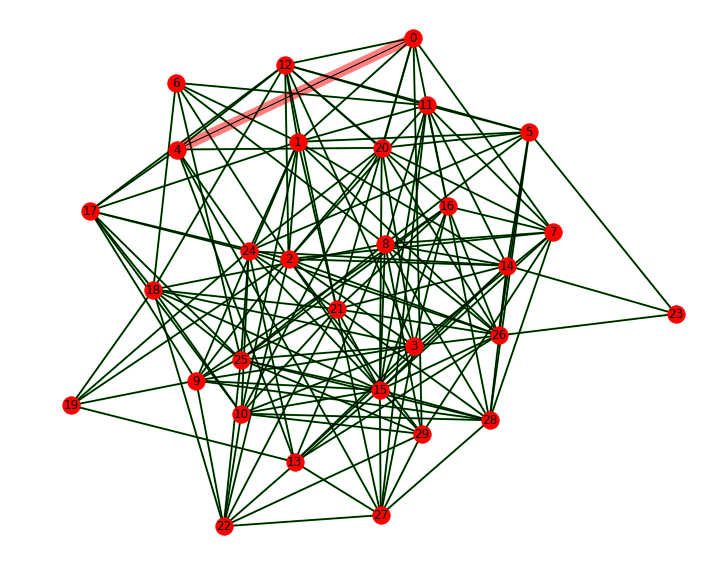

In [255]:
check_balance(G0)
#This is a plot of the positive connected components.
#The red edge is a "-" between two nodes in a positive connected component.

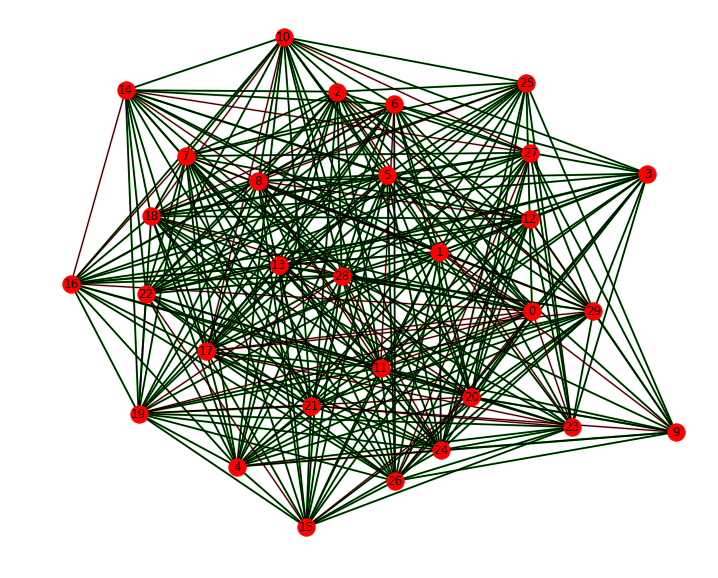

In [258]:
G1 = create_ER_random_signed_graph(30,p = 0.5,plus_prob=0.9)
visualize_Graph(G1,show_labels=False)
#This is a plot of the second graph:

The graph is not balanced.
There's a negative edge between two nodes in a positive connected component.


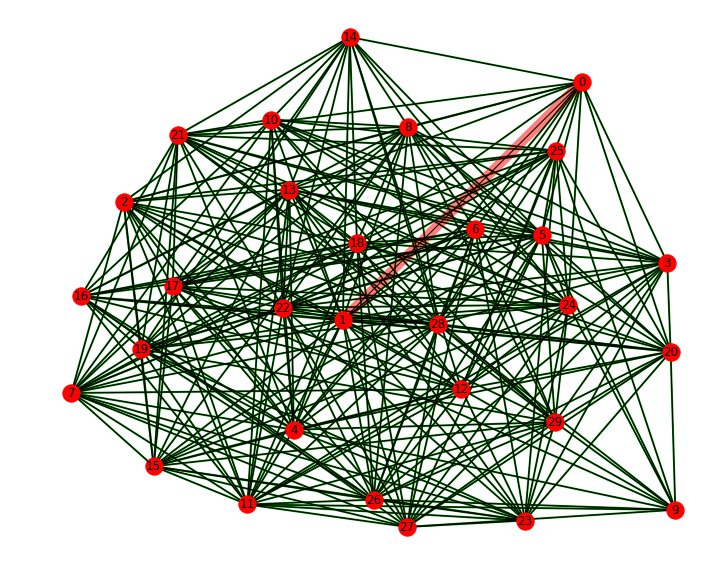

In [260]:
check_balance(G1)
#This is a plot of the positive connected components.
#The red edge is a "-" between two nodes in a positive connected component.

# Q3 - d

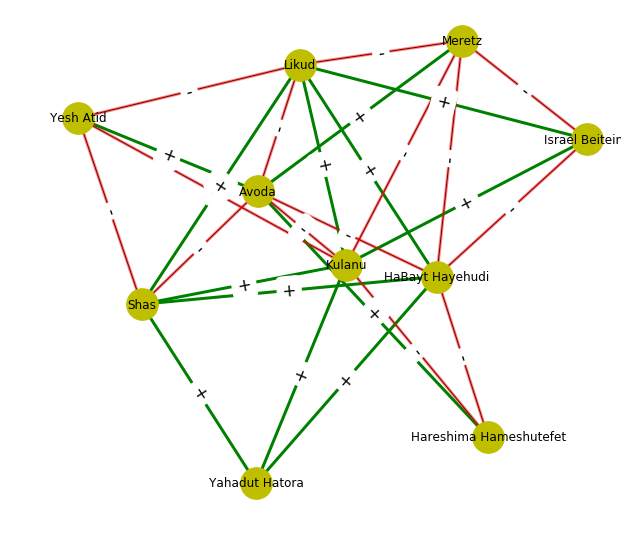

In [306]:
G = nx.Graph()
parties = ["Likud","Avoda","Yesh Atid","Kulanu","Shas","Yahadut Hatora",
           "Hareshima Hameshutefet","Meretz","Israel Beiteinu","HaBayt Hayehudi"]
for party in parties:
    G.add_node(party)
    
G.add_edge("Likud","Avoda",sign = "-")
G.add_edge("Likud","Shas",sign = "+")
G.add_edge("Likud","Yesh Atid",sign = "-")
G.add_edge("Likud","Kulanu",sign = "+")
G.add_edge("Likud","Meretz",sign = "-")
G.add_edge("Likud","HaBayt Hayehudi",sign = "+")
G.add_edge("Likud","Israel Beiteinu",sign = "+")

G.add_edge("Avoda","Yesh Atid",sign = "+")
G.add_edge("Avoda","Shas",sign = "-")
G.add_edge("Avoda","Hareshima Hameshutefet",sign = "+")
G.add_edge("Avoda","Meretz",sign = "+")
G.add_edge("Avoda","Kulanu",sign = "-")
G.add_edge("Avoda","HaBayt Hayehudi",sign = "-")

G.add_edge("Kulanu","Yesh Atid",sign = "-")
G.add_edge("Kulanu","Shas",sign = "+")
G.add_edge("Kulanu","Yahadut Hatora",sign = "+")
G.add_edge("Kulanu","Meretz",sign = "-")
G.add_edge("Kulanu","Hareshima Hameshutefet",sign = "-")
G.add_edge("Kulanu","Israel Beiteinu",sign = "+")


G.add_edge("HaBayt Hayehudi","Shas",sign = "+")
G.add_edge("HaBayt Hayehudi","Hareshima Hameshutefet",sign = "-")
G.add_edge("HaBayt Hayehudi","Israel Beiteinu",sign = "-")
G.add_edge("HaBayt Hayehudi","Meretz",sign = "-")
G.add_edge("HaBayt Hayehudi","Avoda",sign = "-")

G.add_edge("Shas","Yahadut Hatora",sign = "+")
G.add_edge("Shas","HaBayt Hayehudi",sign = "+")
G.add_edge("Shas","Yesh Atid",sign = "-")


G.add_edge("HaBayt Hayehudi","Yahadut Hatora",sign = "+")
G.add_edge("Shas","Yahadut Hatora",sign = "+")


G.add_edge("Meretz","Israel Beiteinu",sign = "-")
    
plt.figure(figsize=(8,7))

pos=nx.nx.kamada_kawai_layout(G) # Just a nice layout
nx.draw(G,pos=pos,with_labels=True,node_size=1000,node_color = 'y')
labels = dict([((u, v), d['sign']) for u, v, d in G.edges(data=True)])
e = nx.draw_networkx_edge_labels(G,pos=pos, edge_labels=labels,font_size = 17)
love=[(u,v) for (u,v,d) in G.edges(data=True) if d['sign'] =='+'] # solid edge
hate=[(u,v) for (u,v,d) in G.edges(data=True) if d['sign'] == '-'] # dashed edge
e = nx.draw_networkx_edges(G,pos,edgelist=love, width=3, edge_color='g')
e = nx.draw_networkx_edges(G,pos,edgelist=hate, width=3,alpha=0.5,edge_color='r')


The graph is not balanced.
There's a negative edge between two nodes in a positive connected component.


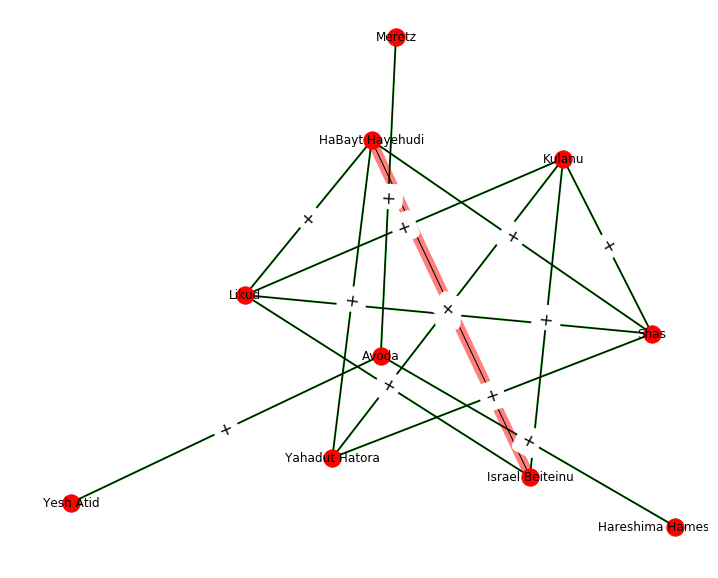

In [281]:
check_balance(G)